In [121]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [122]:
def rotate(n: int):
    f = n/(2**(int(math.log(n,4))+1)-2**int(math.log(n,4)))
    alpha = 2*math.pi*f

    #rotate unit vector [0, 1] by "alpha"
    x = -math.sin(alpha)
    y = math.cos(alpha)
    return (x, y)

def get_line(n: float):
    return (rotate(n), rotate(n*10))

def get_intersection(n: float, step: float = 0.2):
    return get_intersection_lines(get_line(n), get_line(n+step))

def get_intersection_lines(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return None

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return (x, y)

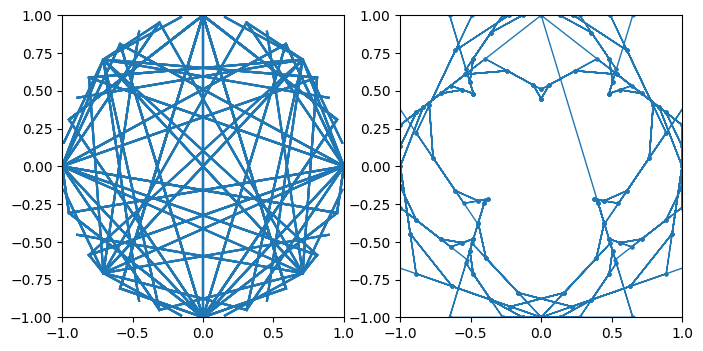

In [123]:
def draw_line(ax, line):
    ax.add_line(mlines.Line2D([line[0][0], line[1][0]], [line[0][1], line[1][1]]))

def draw_dot(ax, pos):
    plt.scatter(pos[0], pos[1], s=2, c='#0000FF')

subplot_size=4
subplot_cols=2
subplot_rows=1

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

ax[0].set_xlim([-1,1])
ax[0].set_ylim([-1,1])
ax[1].set_xlim([-1,1])
ax[1].set_ylim([-1,1])

lines=[]
intersections=[]

for n in np.arange(1, 100, 0.2):
    lines.append(get_line(n))
    intersection=get_intersection(n, 0.2)
    if intersection is not None:
        intersections.append(intersection)

for line in lines:
    draw_line(ax[0], line)

ax[1].plot(*zip(*intersections), '-o', markersize=2, linewidth=1)

plt.show()